<a href="https://colab.research.google.com/github/hxri/Deep-Learning-Lab/blob/main/Experiment_3_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 

In [ ]:
!wget https://raw.githubusercontent.com/hxri/Deep-Learning-Lab/main/Datasets/bank.csv

--2022-04-27 09:47:45--  https://raw.githubusercontent.com/hxri/Deep-Learning-Lab/main/Datasets/bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918960 (897K) [text/plain]
Saving to: ‘bank.csv.1’

bank.csv.1          100%[===================>] 897.42K  --.-KB/s    in 0.05s   

2022-04-27 09:47:46 (18.5 MB/s) - ‘bank.csv.1’ saved [918960/918960]



In [ ]:
df = pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [ ]:
X=df.drop(['deposit', 'age', 'balance', 'day', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous'],axis=1)
y=df['deposit']

In [ ]:
X

,job,marital,education,default,housing,loan,contact,poutcome
0,0,1,1,0,1,0,2,3
1,0,1,1,0,0,0,2,3
2,9,1,1,0,1,0,2,3
3,7,1,1,0,1,0,2,3
4,0,1,2,0,0,0,2,3
...,...,...,...,...,...,...,...,...
11157,1,2,0,0,1,0,0,3
11158,7,1,1,0,0,0,2,3
11159,9,2,1,0,0,0,0,3
11160,9,1,1,0,0,1,0,0


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1917
           1       0.67      0.56      0.61      1767

    accuracy                           0.65      3684
   macro avg       0.66      0.65      0.65      3684
weighted avg       0.66      0.65      0.65      3684



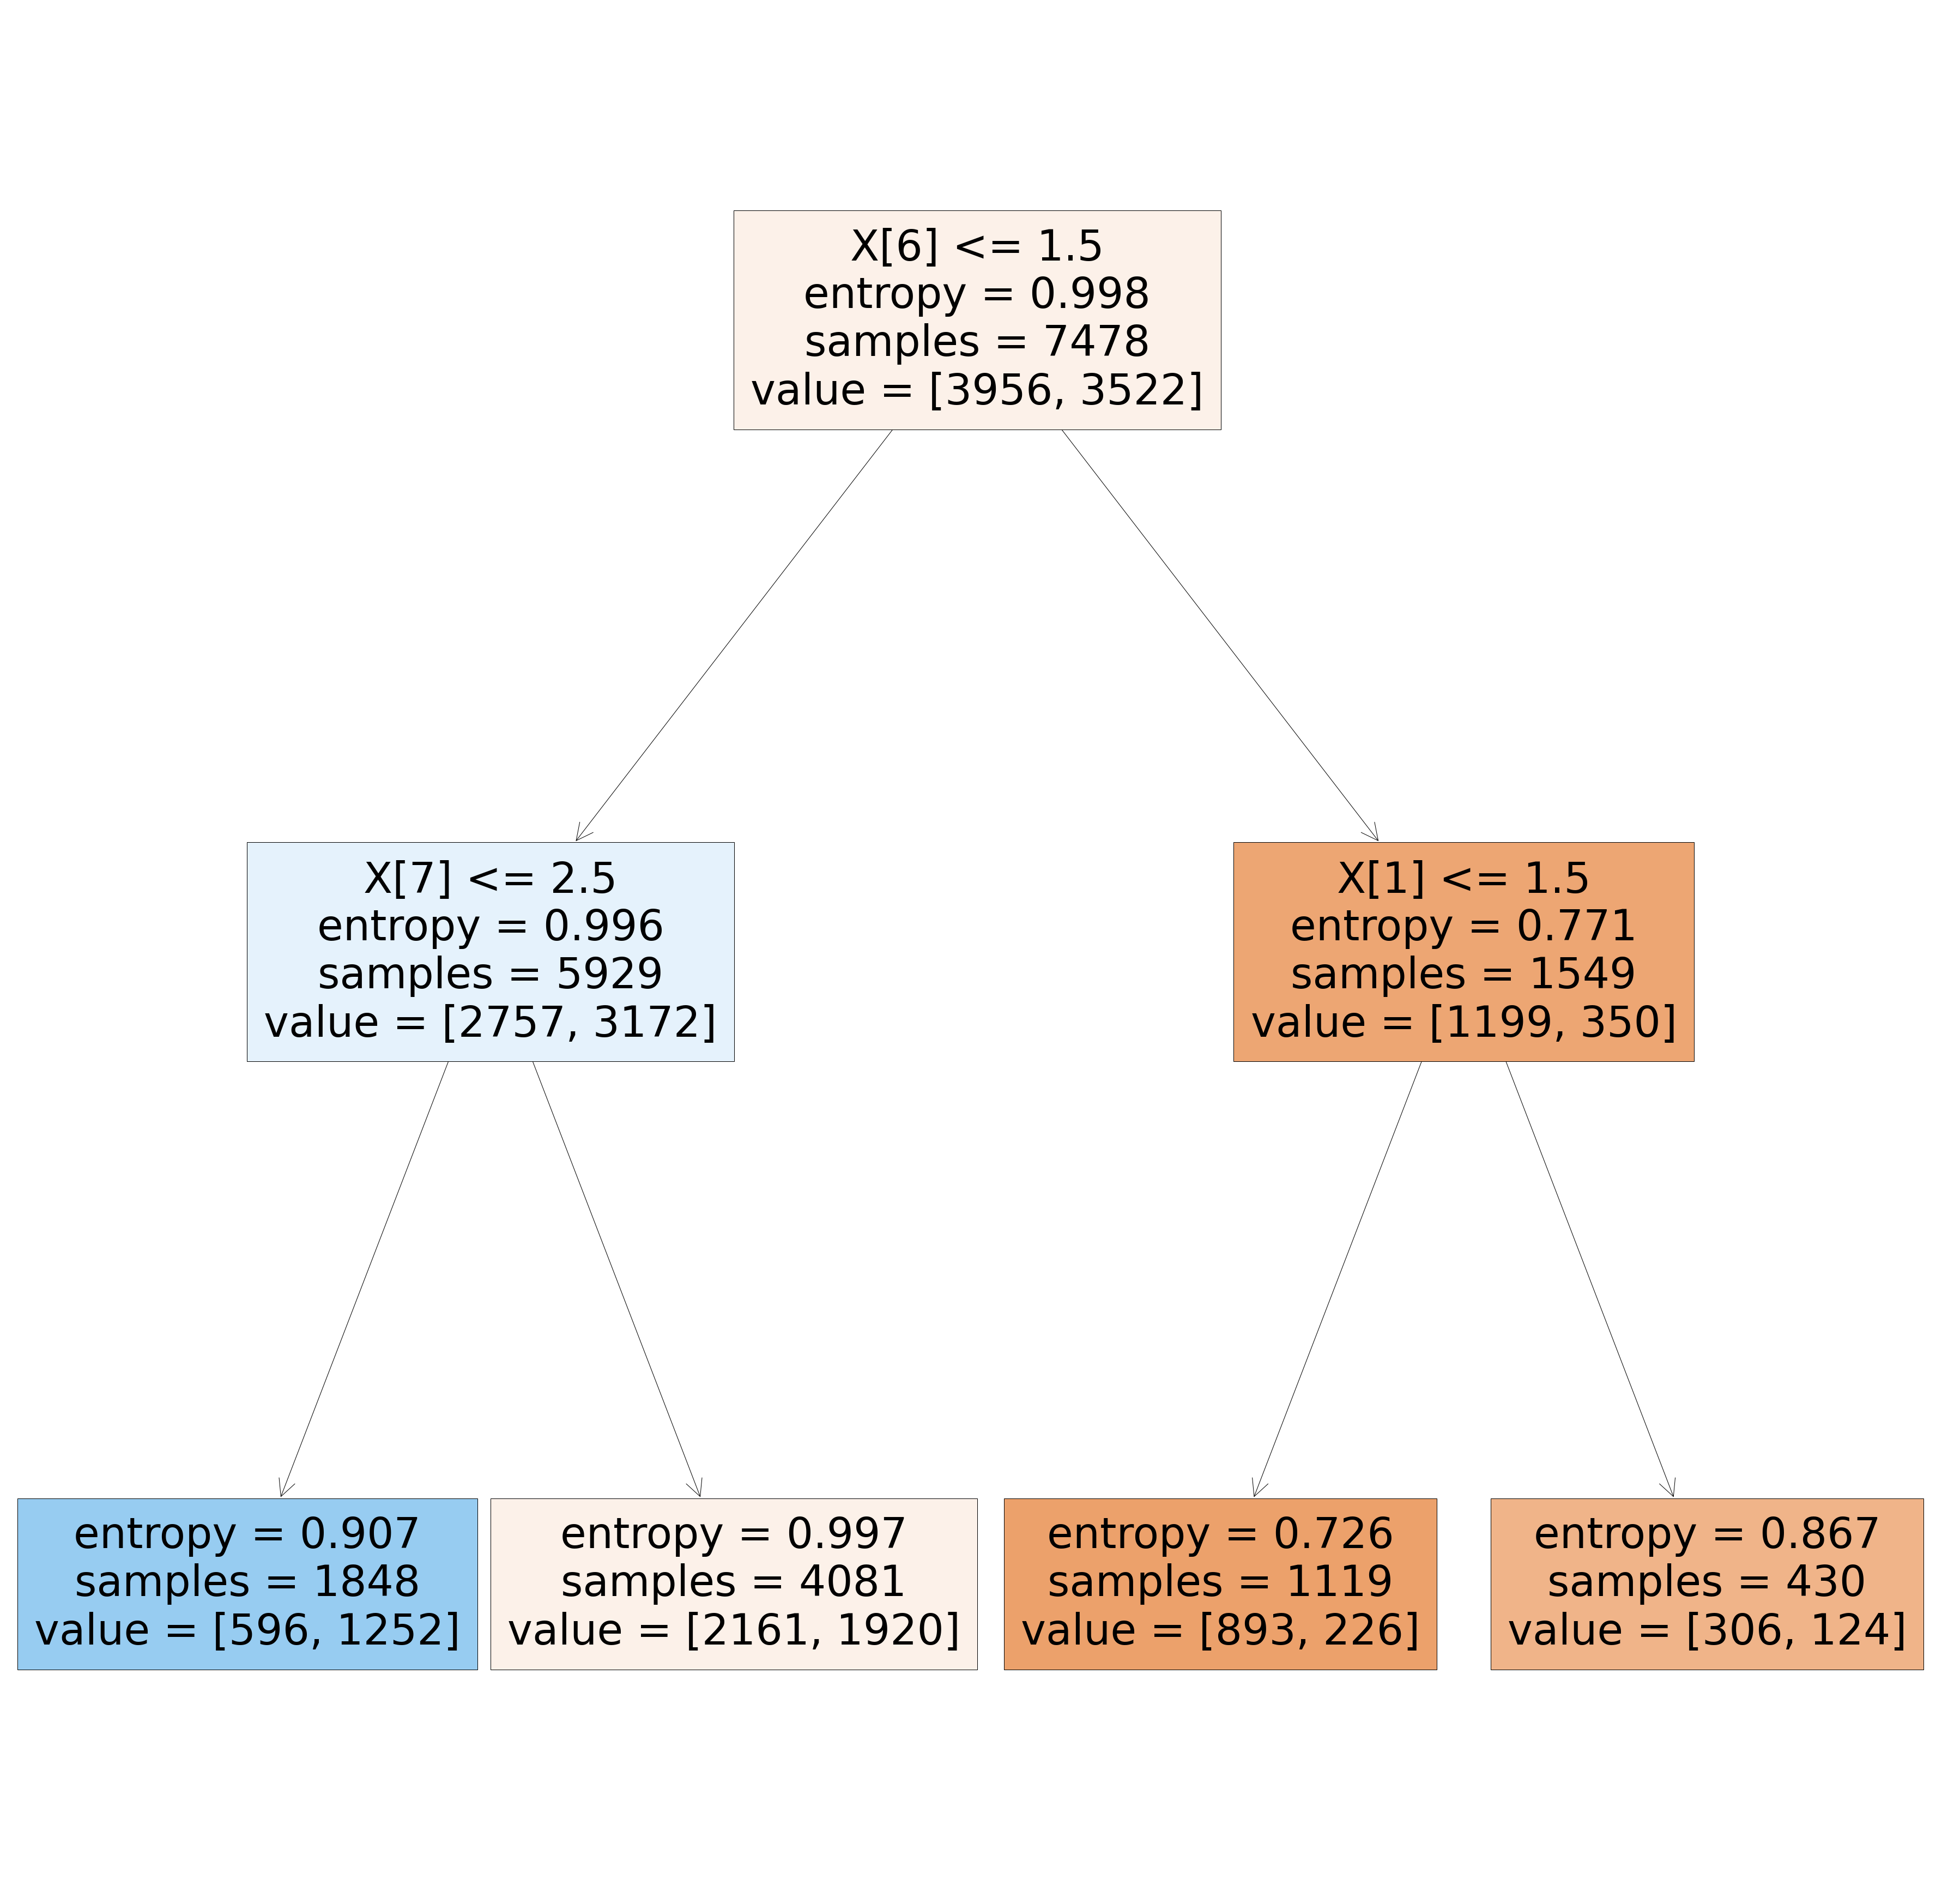

In [ ]:
plt.figure(figsize=(64, 64))
plot_tree(clf, filled=True)
plt.show()

In [ ]:
import graphviz
from sklearn import tree
dot_data=tree.export_graphviz(clf)
graph=graphviz.Source(dot_data)
graph
